<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_11_04_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 8. 텍스트 분석**
---

### **06. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹**
---

#### 개요
- 개념: 문서 집합에 숨어 있는 주제를 찾는 것
- 문서 양이 많을 때 머신러닝 기반의 토픽 모델링을 적용하면 중요한 주제를 효과적으로 찾을 수 있음
- LSA(Latent Semantic Analysis)
- **LDA(Latent Dirichlet Allocation)**
  - 사이킷런: 클래스 제공

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 총 8개 주제 추출하기
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 카테고리만 추출하기
news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

# LDA는 Count 기반의 벡터화만 적용함
count_vect = CountVectorizer(max_df = 0.95,max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer shape: ', feat_vect.shape)

CountVectorizer shape:  (7862, 1000)


- 분석: CountVectorizer 객체 변수인 feat_vect 모두 7862개 문서가 1000개의 피처로 구성된 행렬 데이터
- 이제 LDA 토픽 모델링 진행
- n_components 파라미터: 토픽 개수 조정

In [4]:
lda = LatentDirichletAllocation(n_components=8,random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- **components_속성:** 개별 토픽별로 각 word 피처가 얼마나 많이 이 토픽에 할당됐는지에 대한 수치

In [5]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- 분석: components_는 array[8,4000]으로 구성됨
- 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가짐

In [6]:
def display_topics(model,feature_names,no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 내림차순으로 정렬했을 때 그 값의 array 인덱스를 반환하기
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat하기
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내 전체 word 명칭을 get_features_names를 통해 추출하기
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출하기
display_topics(lda,feature_names,15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **08. 문서 유사도**
---

#### **1. 개요**
- **코사인 유사도(Cosine Similarity):** 두 벡터 간의 유사도를 비교할 때 크기보다는 상호 방향성이 얼마나 유사한지에 기반함 -> 사잇각을 통해 유사도를 수치화한 것

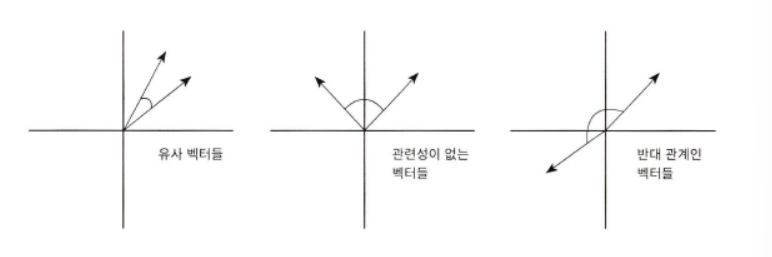

$$A * B = ||A||||B||cos\theta$$

$$similarity = cos\theta = \frac{A \cdot B}{||A||||B||} = \frac{\sum^{n}_{i=1}A_i B_i}{\sqrt{\sum^{n}_{i=1}A_i^2} \sqrt{\sum^{n}_{i=1}B_i^2}}$$

In [7]:
def cos_similarity(v1,v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm
  return similarity

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfid_vect_simple = TfidfVectorizer()
feature_vect_simple = tfid_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [17]:
# 희소 행렬 -> 밀집 행렬로 변환하기
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째와 두 번째 문장의 피처 벡터 추출하기
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 위 두 문장의 코사인 유사도 추출하기
similarity_simple = cos_similarity(vect1,vect2)
print(similarity_simple)

0.40207758214950134


In [18]:
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple13 = cos_similarity(vect1,vect3)
similarity_simple23 = cos_similarity(vect2,vect3)

print(similarity_simple13)
print(similarity_simple23)

0.4042504477594862
0.45647296026166395


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [15]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print(similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
(3, 3)


#### **2. Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [22]:
import glob,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [27]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 왜 오류났는지 알아볼 것.

In [ ]:
path = r'/content/drive/MyDrive/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('||')[-1]
    filename = file_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터가 호텔로 클러스터링된 데이터
#hotel_indexes = document_df[document_df['cluster_label']==1].index
#print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes) 

In [ ]:
# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
#comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
#print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

#similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
#print(similarity_pair)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
#sorted_index = similarity_pair.argsort()[:,::-1]
#sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬하기
#hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하지만 자기 자신은 제외하기
#hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
#hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화하기
#hotel_1_sim_df = pd.DataFrame()
#hotel_1_sim_df['filename'] = (document_df.iloc[hotel_sorted_indexes]['filename']).apply(lambda x : x.strip('/content/drive/MyDrive/2022-2 ESAA/Data/topics/'))
#hotel_1_sim_df['similarity'] = hotel_1_sim_value

#sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
#plt.title(comparison_docname)

### **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**
---

#### **1. 한글 NLP 처리의 어려움**
- 띄어쓰기와 다양한 조사로 인해 다른 언어에 비해 언어 처리가 어려움

#### **2. KnNLPy 소개**
      1. 파이썬의 대표적인 한글 형태소 패키지
      2. 5개의 형태소 분석 모듈 사용 가능함
      3. mecab 경우에는 윈도우 환경에서 구동되지 않음

In [35]:
! pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 6.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [37]:
!pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 8.8 MB/s eta 0:00:00


In [38]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.4 MB/s eta 0:00:00


In [ ]:
train_df = pd.read_csv('rating_train.txt',sep='\t')

In [ ]:
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용해 숫자를 공백으로 변경하기(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환하기
test_df = pd.read_csv('ratings_test.txt', sep="\t")
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# Id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 현태로 반환하기
    tokens_ko = twitter.morphs(text)
    return tokens_ko


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 메서드를 이용한 tokenizer를 사용
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [ ]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행하기
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용하기
params = {'C': [1,3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
from sklearn.metrics import accuracy_score

# 최종 감성 예측 분석 시행하기
# 학습 데이터를 적용한 TfidVectorizer를 이용해 텍스트 데이터를 TF-IDF 값으로 피처 변환하기
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용하기
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))